In [2]:
#load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/TravelInsurancePrediction.csv')
data.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
data.shape

(1987, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

here the unamed column for is for indexing purpose it will be no longer neede for future use so that we drop this feature

In [9]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


#here our target fill is TravelInsurance so that we are modifing this data like 0 means not Brought the insurance & 1 means brought the insurance

In [11]:
data.TravelInsurance = data.TravelInsurance.map({0: "Not Purchased", 1: "Purchased"})

In [12]:
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,Not Purchased
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Not Purchased
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Purchased
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Not Purchased
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Not Purchased
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,Purchased
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,Not Purchased
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,Not Purchased
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,Purchased


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Count'>

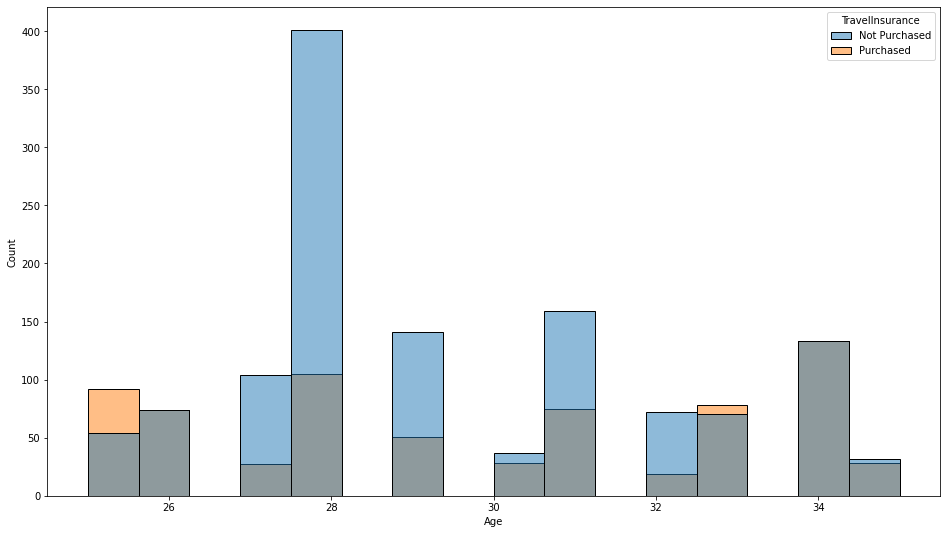

In [18]:
plt.figure(figsize=(16,9))
sns.histplot(data=data,x='Age',hue='TravelInsurance')

In [20]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "Age", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Age")
figure_1 = px.histogram(data, x='Employment Type',color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Employement Type")
figure_2 = px.histogram(data, x = "AnnualIncome", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Income")
figure.show()
figure_1.show()
figure_2.show()

According to the above image, persons who are 34 or older are more likely to purchase insurance, while those who are 28 or younger are far less likely. Let's now examine how a person's line of work affects the decision to get insurance:




According to the visualization above, people working in the private sector or the self-employed are more likely to have an insurance policy. Now let’s see how a person’s annual income affects the purchase of an insurance policy:



According to the above visualisation, people who are having an annual income of more than 1400000 are more likely to purchase the insurance policy.

In [26]:
#now converting categorical varable to numeric varaible
data.GraduateOrNot = data.GraduateOrNot.map({"No": 0, "Yes": 1})
data.FrequentFlyer = data.FrequentFlyer.map({"No": 0, "Yes": 1})
data.EverTravelledAbroad = data.EverTravelledAbroad.map({"No": 0, "Yes": 1})
x = np.array(data[["Age", "GraduateOrNot", 
                   "AnnualIncome", "FamilyMembers", 
                   "ChronicDiseases", "FrequentFlyer", 
                   "EverTravelledAbroad"]])
y = np.array(data[["TravelInsurance"]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [34]:
param_dict = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(1,11),
    'min_samples_split' : range(1,11),
    'min_samples_leaf' : range (1,3)
}

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.3,random_state=42)

In [32]:
dTree = DecisionTreeClassifier()

In [35]:
grid_cv = GridSearchCV(dTree,param_grid=param_dict,cv=15,verbose=3,n_jobs=-1,refit=True)
grid_cv.fit(xtrain,ytrain)

Fitting 15 folds for each of 400 candidates, totalling 6000 fits


D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


600 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "D:\Users\UDCSI-WS-016\Anaconda3\lib\site-pac

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(1, 11)},
             verbose=3)

In [36]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [39]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [40]:
grid_cv.best_score_

0.8373076923076925

In [41]:
grid_cv.score(xtest,ytest)

0.8332135154565061

In [42]:
grid_cv.predict(xtest)

array(['Not Purchased', 'Purchased', 'Not Purchased', ...,
       'Not Purchased', 'Not Purchased', 'Purchased'], dtype=object)

In [49]:
#Now try to do with by default parameter
dTree_Default = DecisionTreeClassifier()

In [50]:
dTree_Default.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [51]:
dTree_Default.score(xtest,ytest)

0.732566498921639

#now you are bale to see waht is the deffrence after applying HyperParameter Tuning 

<IPython.core.display.Javascript object>

[Text(0.7500049952046036, 0.9772727272727273, 'X[2] <= 1325000.0\ngini = 0.47\nsamples = 596\nvalue = [371, 225]'),
 Text(0.5477508258738278, 0.9318181818181818, 'X[0] <= 32.5\ngini = 0.374\nsamples = 481\nvalue = [361, 120]'),
 Text(0.2890225383631714, 0.8863636363636364, 'X[2] <= 425000.0\ngini = 0.314\nsamples = 374\nvalue = [301, 73]'),
 Text(0.03410059676044331, 0.8409090909090909, 'X[3] <= 4.5\ngini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(0.027280477408354646, 0.7954545454545454, 'X[0] <= 30.0\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.020460358056265986, 0.75, 'X[0] <= 28.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.013640238704177323, 0.7045454545454546, 'X[4] <= 0.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.0068201193520886615, 0.6590909090909091, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.020460358056265986, 0.6590909090909091, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.013640238704177323, 0.61

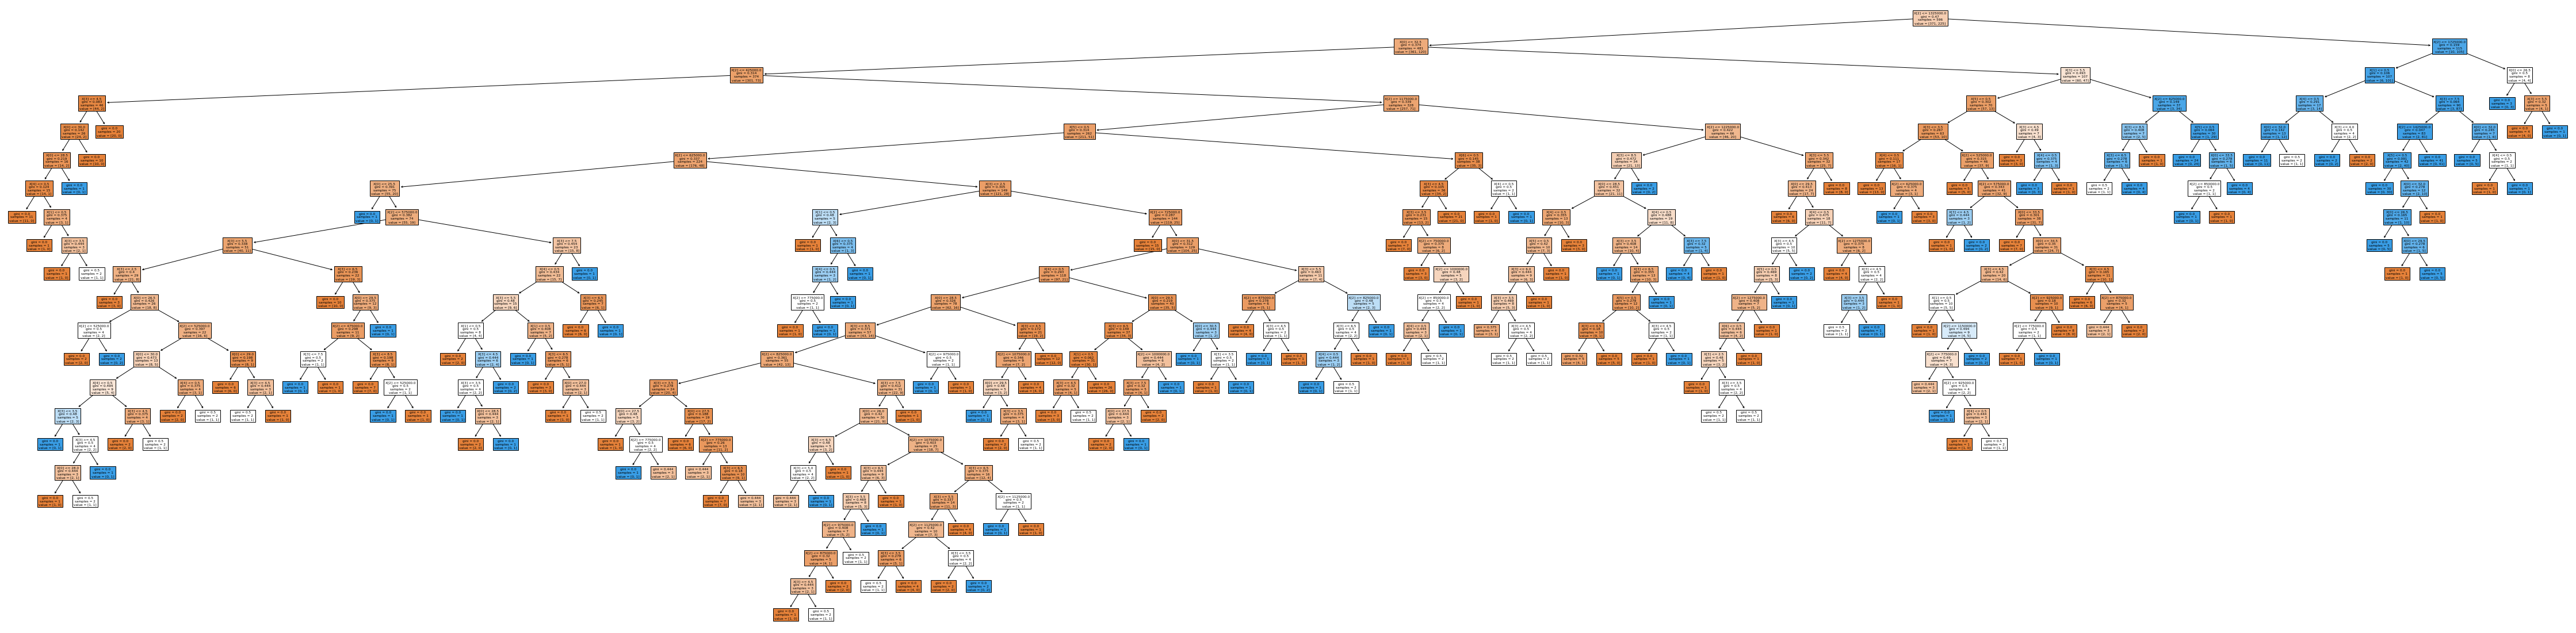

In [52]:
from sklearn import tree
plt.figure(figsize =(80,20))
tree.plot_tree(dTree_Default,filled=True)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,dTree_Default.predict(xtest)))

[[717 189]
 [183 302]]


In [56]:
print(classification_report(ytest,dTree_Default.predict(xtest)))

               precision    recall  f1-score   support

Not Purchased       0.80      0.79      0.79       906
    Purchased       0.62      0.62      0.62       485

     accuracy                           0.73      1391
    macro avg       0.71      0.71      0.71      1391
 weighted avg       0.73      0.73      0.73      1391



In [57]:
print(confusion_matrix(ytest,grid_cv.predict(xtest)))

[[879  27]
 [205 280]]


In [58]:
print(classification_report(ytest,grid_cv.predict(xtest)))

               precision    recall  f1-score   support

Not Purchased       0.81      0.97      0.88       906
    Purchased       0.91      0.58      0.71       485

     accuracy                           0.83      1391
    macro avg       0.86      0.77      0.80      1391
 weighted avg       0.85      0.83      0.82      1391

